<a href="https://colab.research.google.com/github/dhairyaostwal/CSE4020-Codes/blob/main/Regression/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression 
### Dhairya Ostwal
### 19BCE2199
### LAB DA 2

**Date: 28th January 2022**

Perform linear regression, polynomial regression and multiple regression for residual error plotting on Cancer dataset

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
dataset = pd.read_csv('cancer-data-regression - cancer-data.csv')

In [70]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

Printing out mean values of avg_cyt_re, avg_cyt_gr represented in column **avg_re_gr**

In [71]:
X

array([[127.190595 ],
       [ 91.6097562],
       [132.9455025],
       [126.897441 ],
       [146.737783 ],
       [111.3365829],
       [ 74.8049587],
       [129.3886555],
       [137.4799025],
       [119.367084 ]])

Printing out target variable **Diagnosis** value

In [72]:
y

array(['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [62]:
len(y)

10

Converting 'M' values to 1 and 'B' values of Diagnosis column to 1 and 0 respectively for calculation

In [73]:
i=0;

while i < 10:
  if(y[i] == 'M'):
    y[i] = 1
  else:
    y[i] = 0
  i+=1;

y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0], dtype=object)

### Viewing the cancer dataset

>NOTE: avg_re_gr is the mean of columns avg_cyt_gr and avg_cyt_re

In [74]:
dataset.head()

,avg_cyt_re,avg_cyt_gr,avg_re_gr,Diagnosis
0,130.713275,123.667915,127.190595,1
1,115.975610,67.243902,91.609756,0
2,135.955693,129.935312,132.945503,1
3,131.139544,122.655338,126.897441,1
4,150.808105,142.667461,146.737783,1


## Linear Regression 

Linear regression is a linear model, a model that assumes a linear relationship between -
1. the input variables (x) 
2. the single output variable (y)

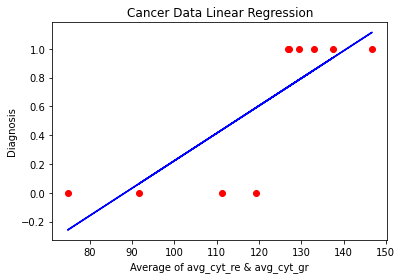

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Cancer Data Linear Regression')
plt.xlabel('Average of avg_cyt_re & avg_cyt_gr')
plt.ylabel('Diagnosis')
plt.show()

## Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

LinearRegression()

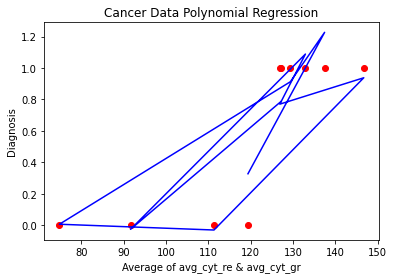

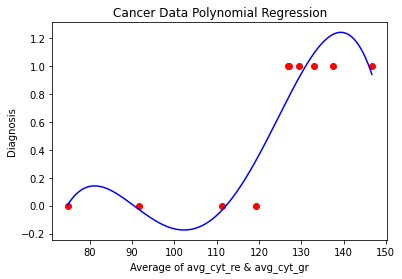

In [86]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') 
plt.title('Cancer Data Polynomial Regression')
plt.xlabel('Average of avg_cyt_re & avg_cyt_gr')
plt.ylabel('Diagnosis')
plt.show()

# arranging X values for better curve formation
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue') 
plt.title('Cancer Data Polynomial Regression')
plt.xlabel('Average of avg_cyt_re & avg_cyt_gr')
plt.ylabel('Diagnosis')
plt.show()

## Predicting Values

In [87]:
lin_reg.predict([[76]]) 

array([-0.23483183])

In [88]:
lin_reg_2.predict(poly_reg.fit_transform([[76]]))

array([0.05655559])

## Multiple Regression

Multiple regression is a statistical technique that can be used to analyze the relationship between a single dependent variable and several independent variables. The objective of multiple regression analysis is to use the independent variables whose values are known to predict the value of the single dependent value.

In [91]:
# splitting X and y into training and testing sets

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [92]:
# create linear regression object
reg = linear_model.LinearRegression()

In [93]:
# train the model using the training sets 
reg.fit(X_train, y_train)

LinearRegression()

In [94]:
# regression coefficients 
print('Coefficients: ', reg.coef_)


Coefficients:  [0.02796557]


In [95]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.06627389020513652


## Plotting the Residual Errors graph

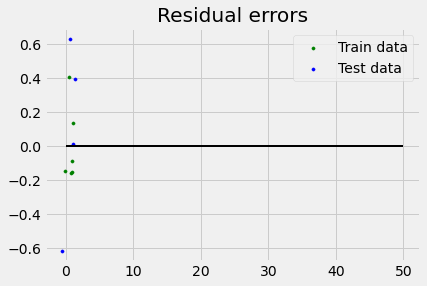

In [102]:
# plot for residual error

## setting plot style 
plt.style.use('fivethirtyeight')

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend 
plt.legend(loc = 'upper right')

## plot title 
plt.title("Residual errors")

## method call for showing the plot 
plt.show()